# 화소 처리

## 화소의 접근

### 행렬 원소의 접근 - 모든 원소를 순회하여 원소값을 2배로 변경

In [ ]:
import numpy as np

def mat_access1(mat):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            k = mat[i, j]  # 원소 접근 - mat1[i][j] 방식도 가능
            mat[i, j] = k * 2  # 원소 할당

def mat_access2(mat):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            k = mat.item(i, j)  # 원소 접근
            mat.itemset((i, j), k * 2)  # 원소 할당

mat1 = np.arange(10).reshape(2, 5)
mat2 = np.arange(10).reshape(2, 5)

print("원소 처리 전: \n%s\n" % mat1)
mat_access1(mat1)
print("원소 처리 후: \n%s\n" % mat1)

print("원소 처리 전: \n%s\n" % mat2)
mat_access2(mat2)
print("원소 처리 후: \n%s" % mat2)

### Mat:ptr()을 통한 행렬 원소 접근

In [ ]:
import numpy as np, cv2, time

def pixel_access1(image):
    image1 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]                  # 화소 접근
            image1[i, j] =  255 - pixel            # 화소 할당
    return image1

def pixel_access2(image):
    image2 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image.item(i, j)  # 화소 접근
            image2.itemset((i, j),  255 - pixel)  # 화소 할당
    return image2

def pixel_access3(image):
    lut = [255 - i for i in range(256)]  # 룩업테이블 생성
    lut = np.array(lut, np.uint8)
    image3 = lut[image]
    return image3

def pixel_access4(image):
    image4 = cv2.subtract(255, image)
    return image4

def pixel_access5(image):
    image5 = 255 - image
    return image5

image = cv2.imread("./data/bright.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류 발생")

# 수행시간 체크
def time_check(func, msg):
    start_time = time.perf_counter()
    ret_img = func(image)
    elapsed = (time.perf_counter() - start_time) * 1000
    print(msg, "수행시간 : %.2f ms" % elapsed)
    return ret_img

image1 = time_check(pixel_access1, "[방법 1] 직접 접근 방식")
image2 = time_check(pixel_access2, "[방법 2] item() 함수 방식")
image3 = time_check(pixel_access3, "[방법 3] 룩업 테이블 방식")
image4 = time_check(pixel_access4, "[방법 4] OpenCV 함수 방식")
image5 = time_check(pixel_access5, "[방법 5] ndarray 연산 방식")

# 결과 영상 보기
cv2.imshow("image  - original", image)
cv2.imshow("image1 - directly access to pixel", image1)
cv2.imshow("image2 - item()/itemset()", image2)
cv2.imshow("image3 - LUT", image3)
cv2.imshow("image4 - OpenCV", image4)
cv2.imshow("image5 - ndarray 방식", image5)
cv2.waitKey(0)

## 화소 밝기 전환

### 영상 화소값 확인

In [ ]:
import cv2

image = cv2.imread("./data/pixel.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

(x,y),(w,h) = (180, 37), (15, 10)                   # 좌표는 x, y
roi_img = image[y:y+h, x:x+w]                   # 행렬 접근은 y, x

#print(“[roi_img] =\n”, roi_img) # 행렬 원소 바로 출력 가능

print("[roi_img] =")
for row in roi_img:
    for p in row:
        print("%4d" % p, end="")       # 행렬 원 하나 출력
    print()

cv2.rectangle(image, (x,y, w,h), 255, 1)
cv2.imshow("image", image)
cv2.waitKey(0)

### 행렬의 가감 연산을 이용한 영상 밝기 변경

In [ ]:
import cv2

image = cv2.imread("./data/bright.jpg", cv2.IMREAD_GRAYSCALE)    # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

# OpenCV 함수 이용
dst1 = cv2.add(image, 100)                  # 영상 밝게 saturation 방식
dst2 = cv2.subtract(image, 100)             # 영상 어둡게

# numpy array 이용
dst3 = image + 100                          # 영상 밝게 modulo 방식
dst4 = image - 100                          # 영상 어둡게

cv2.imshow("original image", image)
cv2.imshow("dst1- bright: OpenCV", dst1)
cv2.imshow("dst2- dark: OpenCV", dst2)
cv2.imshow("dst3- bright: numpy", dst3)
cv2.imshow("dst4- dark: numpy", dst4);
cv2.waitKey(0)

## 행렬 합 과 곱 연산을 통한 영상 합성

In [ ]:
import numpy as np, cv2

image1 = cv2.imread("./data/add1.jpg", cv2.IMREAD_GRAYSCALE)   # 영상 읽기
image2 = cv2.imread("./data/add2.jpg", cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None: raise Exception("영상 파일 읽기 오류 발생")

# 영상 합성
alpha, beta = 0.6, 0.7                                        # 곱샘 비율
add_img1 = cv2.add(image1 , image2)                            # 두 영상 단순 더하기
add_img2 = cv2.add(image1 * alpha , image2 * beta)             # 두영상 비율에 따른 더하기
add_img2 = np.clip(add_img2, 0, 255).astype("uint8")           # saturation 처리
add_img3 = cv2.addWeighted(image1, alpha, image2, beta, 0)     # 두영상 비율에 따른 더하기

titles = ['image1','image2','add_img1','add_img2','add_img3']
for t in titles: cv2.imshow(t, eval(t))
cv2.waitKey(0)


### 명암 대비 변경

In [ ]:
import numpy as np, cv2

image = cv2.imread("./data/contrast.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

noimage = np.zeros(image.shape[:2], image.dtype)        # 더미 영상
avg = cv2.mean(image)[0]/2.0                            # 영상 화소 평균의 절반

dst1 = cv2.scaleAdd(image, 0.2, noimage) + 20               # 영상대비 감소
dst2 = cv2.scaleAdd(image, 2.0, noimage)                # 영상대비 증가
dst3 = cv2.addWeighted(image, 0.5, noimage, 0, avg)     # 명암대비 감소
dst4 = cv2.addWeighted(image, 2.0, noimage, 0,-avg)     # 명암대비 증가

# 영상 띄우기
cv2.imshow("image", image)
cv2.imshow("dst1 - decrease contrast", dst1)
cv2.imshow("dst2 - increase contrast", dst2)
cv2.imshow("dst3 - decrease contrast using average", dst3)
cv2.imshow("dst4 - increase contrast using average", dst4)

cv2.imwrite("dst.jpg",dst1)
cv2.waitKey(0)

## 임계 처리

### 임계값 영상

In [ ]:
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()

In [ ]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_grey = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 적응적 임계처리를 적용합니다.
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# 이미지를 출력합니다.
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

## histogram

### 직접 계산

In [ ]:
import numpy as np, cv2

def calc_histo(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1] / hsize  # 계급 간격

    for row in image:  # 2차원 행렬 순회 방식
        for pix in row:
            idx = int(pix / gap)
            hist[idx] += 1
    return hist

image = cv2.imread("./data/pixel.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

hsize, ranges = [16], [0, 256]  # 히스토그램 간격수, 값 범위
hist = calc_histo(image, hsize[0], ranges)  # 사용자 정의 히스토그램 계산

print("사용자 정의 함수: \n", hist.flatten())  # 행렬을 벡터로 변환하여 출력
cv2.imshow("image", image)
cv2.waitKey(0)

### opencv 함수를 이용한 histogram

In [1]:
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist1 = ', hist1)

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)

hist1 =  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 =  [[4.]
 [5.]
 [0.]
 [3.]]


### 흑백 이미지 히스토그램

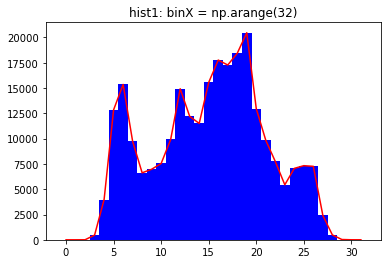

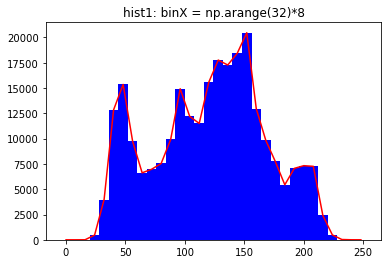

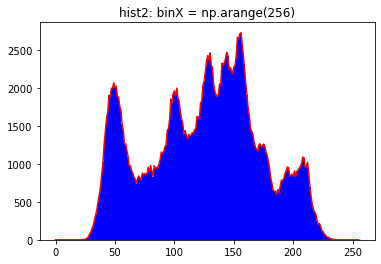

In [3]:
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[32], ranges=[0, 256])

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()


### 컬러 이미지 히스토그램

[107 163 212]
[1027.  217.  182.  146.  146.]


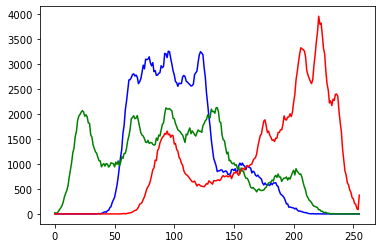

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#이미지 파일을 로드
image_bgr = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_COLOR)
#RGB로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# RGB 채널 값을 확인
print(image_rgb[0,0])

#특성값을 담을 리스트 생성
features = []

# 각 컬러 채널에 대한 Histogram을 계산합니다.
colors = ("r","g","b")

# 컬러 채널을 반복하면서 Histogram을 계산하고 리스트에 추가
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                        [i], # 채널 인덱스
                        None, # 마스크 없음
                        [256], # Histogram 크기
                        [0,256]) # 범위
    features.extend(histogram)

#샘플의 특성값으로 벡터를 생성
observation = np.array(features).flatten()
#다섯개의 특성을 출력
print(observation[0:5])

import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')
histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                    histSize=[256], ranges=[0, 256])
    plt.plot(hist, color = histColor[i])
plt.show()


### 컬러 이미지 2채널 히스토그램 

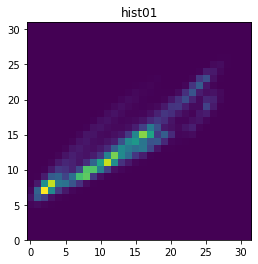

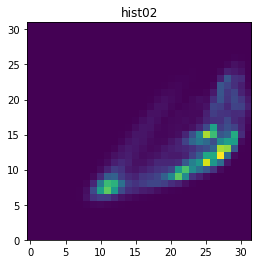

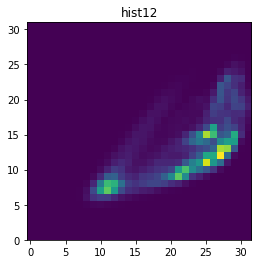

In [5]:
# 컬러 이미지 2채널 Histogram
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None,
	[32, 32], [0, 256, 0, 256])
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "nearest")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

### histogram stretching

In [ ]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

def search_value_idx(hist, bias = 0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)                     # 검색 위치 (처음 또는 마지막)
        if hist[idx] > 0:  return idx                             # 위치 반환
    return -1                                      # 대상 없으면 반환

image = cv2.imread("./data/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)   # 영상읽기
if image is None: raise Exception("영상 파일 읽기 오류")

bsize, ranges = [64], [0,256]                        # 계급 개수 및 화소 범위
hist = cv2.calcHist([image], [0], None, bsize, ranges)

bin_width  = ranges[1]/bsize[0]                      # 계급 너비
high = search_value_idx(hist, bsize[0] - 1) * bin_width
low  = search_value_idx(hist, 0) * bin_width

idx = np.arange(0, 256)
idx = (idx - low) * 255/(high-low)	# 수식 적용하여 인덱스 생성
idx[0:int(low)] = 0
idx[int(high+1):] = 255

dst = cv2.LUT(image, idx.astype('uint8'))
## 룩업 테이블 사용하지 않고 직접 구현
# dst = np.zeros(image.shape, dtype=image.dtype)
# for i in range(dst.shape[0]):
#     for j in range(dst.shape[1]):
#         dst[i,j] = idx[image[i,j]]

hist_dst = cv2.calcHist([dst], [0], None, bsize, ranges)  # 결과 영상 히스토그램 재계산
hist_img = draw_histo(hist, (200,360))          # 원본 영상 히스토그램 그리기
hist_dst_img = draw_histo(hist_dst,(200,360))  # 결과 영상 히스토그램 그리기

print("high_value = ", high)
print("low_value = " , low)
cv2.imshow("image", image);         cv2.imshow("hist_img", hist_img)
cv2.imshow("dst", dst);             cv2.imshow("hist_dst_img", hist_dst_img)
cv2.waitKey(0)

### histogram 평활화

In [ ]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

image = cv2.imread("./data/equalize.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

bins, ranges = [256], [0, 256]
hist = cv2.calcHist([image], [0], None, bins, ranges)    # 히스토그램 계산

# 히스토그램 누적합 계산
accum_hist = np.zeros(hist.shape[:2], np.float32)
accum_hist[0] = hist[0]
for i in range(1, hist.shape[0]):
    accum_hist[i] = accum_hist[i - 1] + hist[i]

accum_hist = (accum_hist / sum(hist)) * 255                 # 누적합의 정규화
dst1 = [[accum_hist[val] for val in row] for row in image] # 화소값 할당
dst1 = np.array(dst1, np.uint8)

# #numpy 함수 및 룩업 테이블 사용
# accum_hist = np.cumsum(hist)                      # 누적합 계산
# cv2.normalize(accum_hist, accum_hist, 0, 255, cv2.NORM_MINMAX)  # 정규화
# dst1 = cv2.LUT(image, accum_hist.astype("uint8"))  #룩업 테이블로 화소값할당

dst2 = cv2.equalizeHist(image)                # OpenCV 히스토그램 평활화
hist1 = cv2.calcHist([dst1], [0], None, bins, ranges)   # 히스토그램 계산
hist2 = cv2.calcHist([dst2], [0], None, bins, ranges)   # 히스토그램 계산
hist_img = draw_histo(hist)
hist_img1 = draw_histo(hist1)
hist_img2 = draw_histo(hist2)

cv2.imshow("image", image);             cv2.imshow("hist_img", hist_img)
cv2.imshow("dst1_User", dst1);          cv2.imshow("User_hist", hist_img1)
cv2.imshow("dst2_OpenCV", dst2);        cv2.imshow("OpenCV_hist", hist_img2)
cv2.waitKey(0)

In [6]:
# 배열의 히스토그램
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]
              ], dtype=np.uint8)

dst = cv2.equalizeHist(src)
print('dst =', dst)


dst = [[  0   0   0   0]
 [106 106 170 212]
 [234 106 106 170]
 [191 170 106 255]]


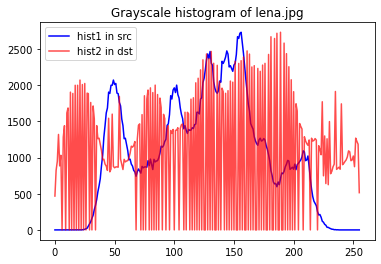

In [7]:
# 그레이스케일 영상의 Histogram Equalization
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

## Color Space Convert

### BGR-CMY 변환

In [ ]:
import numpy as np, cv2

BGR_img = cv2.imread("./data/color_model.jpg", cv2.IMREAD_COLOR)  # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

white = np.array([255, 255, 255], np.uint8)
CMY_img = white - BGR_img
Cyan, Magenta, Yellow = cv2.split(CMY_img)  # 채널 분리

titles = ['BGR_img', 'CMY_img', 'Cyan', 'Magenta', 'Yellow']
[cv2.imshow(t, eval(t)) for t in titles]
cv2.waitKey(0)


### BGR-CMYK 변환

In [ ]:
import numpy as np, cv2

BGR_img = cv2.imread("./data/color_model.jpg", cv2.IMREAD_COLOR) # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

white = np.array([255, 255, 255], np.uint8)
CMY_img = white - BGR_img
CMY = cv2.split(CMY_img) # 채널 분리

black = cv2.min(CMY[0], cv2.min(CMY[1], CMY[2])) # 원소 간의 최솟값 저장
Yellow, Magenta, Cyan = CMY - black

titles = ['black','Yellow','Magenta','Cyan']
[cv2.imshow(t, eval(t)) for t in titles]
cv2.waitKey(0)

### BGR-HSV 컬러 변환

In [ ]:
import numpy as np, cv2, math

def calc_hsi(bgr):
    # B, G, R = bgr.astype(float)                           # float 형 변환
    B, G, R = float(bgr[0]), float(bgr[1]), float(bgr[2])       # 속도면에 유리
    bgr_sum = (R + G + B)
    # 색상 계산
    tmp1 = ((R - G) + (R - B)) * 0.5
    tmp2 = math.sqrt((R - G) * (R - G) + (R - B) * (G - B))
    angle = math.acos(tmp1 / tmp2) * (180 / np.pi) if tmp2 else 0

    H = angle if B <= G else 360 - angle
    S = 1.0 - 3 * min([R, G, B]) / bgr_sum if bgr_sum else 0
    I = bgr_sum / 3                                                # 명도 계산
    return (H/2, S*255, I)

# BGR 컬러 -> HSI 컬러
def bgr2hsi(image):
    hsv = [[calc_hsi(pixel) for pixel in row] for row in image ]   # 2차원 배열 순회
    return (np.array(hsv)).astype('uint8')

BGR_img = cv2.imread("./data/color_space.jpg", cv2.IMREAD_COLOR) # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

HSI_img = bgr2hsi(BGR_img)                  # BGR를 HSI로 변환
HSV_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2HSV) # OpenCV 함수
Hue, Saturation, Intensity = cv2.split(HSI_img)                    # 채널 분리
Hue2, Saturation2, Intensity2 = cv2.split(HSV_img) 					# 채널 분리

titles = ['BGR_img','Hue','Saturation','Intensity']
[cv2.imshow(t, eval(t)) for t in titles]
[cv2.imshow('OpenCV_'+t, eval(t+'2')) for t in titles[1:]]	# OpenCV 결과 영상 표시
cv2.waitKey(0)

### 다양한 컬러 공간 변환

In [ ]:
import cv2

BGR_img = cv2.imread("./data/color_space.jpg", cv2.IMREAD_COLOR)  # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

Gray_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2GRAY)  # 명암도 영상 변환
YCC_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2YCrCb)  # YCbCr 컬러 공간 변환
YUV_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2YUV)  # YUV 컬러 공간 변환
LAB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2LAB)  # La*b* 컬러 공간 변환

YCC_ch = cv2.split(YCC_img)
YUV_ch = cv2.split(YUV_img)
Lab_ch = cv2.split(LAB_img)

cv2.imshow("BGR_img", BGR_img)
cv2.imshow("Gray_img", Gray_img)

sp1, sp2, sp3 = ['Y', 'Cr', 'Cb'], ['Y', 'U', 'V'], ['L', 'A', 'B']
for i in range(len(sp1)):
    cv2.imshow("YCC_img[%d]-%s" % (i, sp1[i]), YCC_ch[i])
    cv2.imshow("YUV_img[%d]-%s" % (i, sp2[i]), YUV_ch[i])
    cv2.imshow("LAB_img[%d]-%s" % (i, sp3[i]), Lab_ch[i])
cv2.waitKey(0)

### Hue 컬러 공간에서 특정 범위 내의 객체 검출

In [ ]:
import numpy as np, cv2

def onThreshold(value):
    th[0] = cv2.getTrackbarPos("Hue_th1", "result")
    th[1] = cv2.getTrackbarPos("Hue_th2", "result")

    ##이진화 - 화소 직접 접근 방법
    # result = np.zeros(hue.shape, np.uint8)
    # for i in range(result.shape[0]):
    #     for j in range(result.shape[1]):
    #         if th[0] <= hue[i, j] < th[1] : result[i, j] = 255

    ##이진화 - 넘파이 함수 활용 방식
    # result = np.logical_and(hue < th[1], hue >= th[0])
    # result = result.astype('uint8') *255

    ## OpenCV 이진화 함수 이용 - 상위 값과 하위 값 제거
    _, result = cv2.threshold(hue, th[1], 255, cv2.THRESH_TOZERO_INV)
    cv2.threshold(result, th[0], 255, cv2.THRESH_BINARY, result)
    cv2.imshow("result", result)

BGR_img = cv2.imread("./data/color_space.jpg", cv2.IMREAD_COLOR) # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

HSV_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2HSV) # 컬러 공간 변환
hue = np.copy(HSV_img[:,:,0])                      # hue 행렬에 색상 채널 복사

th = [50, 100]                                     # 트랙바로 선택할 범위 변수
cv2.namedWindow("result")
cv2.createTrackbar("Hue_th1", "result", th[0], 255, onThreshold)
cv2.createTrackbar("Hue_th2", "result", th[1], 255, onThreshold)
onThreshold(th[0])                                 # 이진화 수행
cv2.imshow("BGR_img", BGR_img)
cv2.waitKey(0)

## Histogram

### 컬러 영상의 Histogram

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg')
cv2.imshow('src',  src)

#1
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### Histogram 역투영

In [1]:
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist = ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
print('backP = ', backP)


hist =  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('./data/fruits.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)


# --⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    # --⑦ 전체 영상에 대한 H,S Histogram 계산
    hist_img = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # --⑧ 선택영역과 전체 영상에 대한 Histogram 그램 비율계산
    hist_rate = hist_roi / (hist_img + 1)
    # --⑨ 비율에 맞는 픽셀 값 매핑
    h, s, v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]
    # 비율은 1을 넘어서는 안되기 때문에 1을 넘는 수는 1을 갖게 함
    bp = np.minimum(bp, 1)
    # 1차원 배열을 원래의 shape로 변환
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp, bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    # --⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp, 'result_manual')

# OpenCV API로 구현한 함수 ---⑪
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    # 빨간 사각형으로 ROI 영역 표시
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 Histogram 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 Histogram을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
    
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()


### 이미지 대비 조절

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("./data/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()
